<a href="https://colab.research.google.com/github/suleymangundz/AIRBNB-Data-Analys/blob/main/AIRBNB%20Data%20Analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import mapclassify
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize
import geopandas as gpd
from google.colab import drive

In [8]:

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AIRBNB Data Analys/listings.csv'
ev_list = pd.read_csv(file_path)
type(ev_list)
ev_list.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
columns_to_drop = ['listing_url','scrape_id','last_scraped','source','picture_url','host_id','host_url','host_since','host_response_time','host_is_superhost', 'host_thumbnail_url', 'host_picture_url','host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified','minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm','availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
ev_list = ev_list.drop(columns = columns_to_drop)

In [11]:
columns_to_process = ['description', 'name','host_name','host_location', 'host_about','neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed','host_neighbourhood','price']
ev_list[columns_to_process] = ev_list[columns_to_process].astype(str).replace('[^\w\s]', '', regex=True)
ev_list

,id,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,...,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,reviews_per_month
0,25436,Rental unit in Beşiktaş bebek 2 bedrooms 4 b...,Evimiz Bebek Koru nun içinde Şehrin içinde k...,NaN,Yesim,İstanbul Turkey,Merhabalar Kuş sesi akan su sesi ile uyanac...,NaN,NaN,Beşiktaş,...,1 bath,2.0,4.0,"[""Cleaning products"", ""Hot water kettle"", ""Saf...",289400,3,1125,NaN,t,NaN
1,27271,Rental unit in Istanbul Province 50 1 bedroo...,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,Mutlu,Istanbul Turkey,I am a tourist guide and diving instructor I ...,0%,50%,Cihangir,...,1 bath,1.0,1.0,"[""Cleaning products"", ""Hot water kettle"", ""Saf...",144700,10,90,NaN,t,0.04
2,423833,Rental unit in Istanbul 1 bedroom 4 beds 1 ...,bThe spacebbr Hithe house is central and in a ...,The neigborhood is safe. It's central anything...,Sanem,Istanbul Turkey,Hi\r\nI am expecting guests I think i am frien...,NaN,NaN,Şişli,...,1 bath,NaN,4.0,"[""Heating"", ""Wifi"", ""Dryer"", ""Hot tub"", ""Washe...",115700,2,60,NaN,f,0.01
3,28277,Serviced apartment in Istanbul 50 1 bedroom ...,bThe spacebbr The first advantage to stay in o...,NaN,Alen,İstanbul Turkey,I have been working as a property manager in İ...,100%,78%,Şişli,...,1 bath,1.0,2.0,"[""Washer"", ""Bathtub"", ""Heating"", ""Patio or bal...",257500,10,360,NaN,t,0.28
4,429200,Loft in Istanbul Galata Beyoglu Tophane 2 be...,bThe spacebbr in the heart of İstanbul in the ...,NaN,Mehmet Ali,Istanbul Turkey,I am experienced in hosting people from all ov...,NaN,100%,Karaköy,...,1 bath,2.0,2.0,"[""Cleaning products"", ""Hot water kettle"", ""Fre...",228600,5,1125,NaN,t,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47513,986773115219367953,Rental unit in Şişli New 1 bedroom 1 bed 1...,Bu huzurlu konaklama yerinde ailece dinlenebil...,NaN,Cumali,nan,nan,NaN,NaN,nan,...,1 bath,1.0,1.0,"[""Washer"", ""Kitchen"", ""TV"", ""Wifi""]",115700,1,365,NaN,t,NaN
47514,986776164830323649,Rental unit in Kadıköy New 3 bedrooms 4 bed...,Welcome to Moda district the most modern face ...,NaN,Serhan,Fethiye Turkey,Traveller couple,100%,NaN,nan,...,2 baths,3.0,4.0,"[""Cleaning products"", ""Hot water kettle"", ""Mos...",250000,5,60,NaN,t,NaN
47515,986790278919805377,Rental unit in Kadıköy New 2 bedrooms 2 bed...,central location apartment in kadikoy istanbul...,NaN,Sherif,nan,nan,100%,100%,nan,...,1 bath,2.0,2.0,"[""Washer"", ""Dedicated workspace"", ""Wifi"", ""Sel...",118400,3,90,NaN,t,NaN
47516,986796471490590812,Rental unit in Beyoğlu New 1 bedroom 1 bed ...,Welcome to a stay at an apartment in a newly r...,NaN,Tevfik,Izmir Turkey,nan,100%,90%,nan,...,1 bath,1.0,1.0,"[""Cleaning products"", ""Hot water kettle"", ""Toa...",205800,2,365,NaN,t,NaN


In [24]:
ev_list['geometry'] = ev_list[['longitude', 'latitude']].apply(shp.Point, axis=1)
ev_list= gpd.GeoDataFrame(ev_list)
type(ev_list)
ev_list.crs = {'init':'epsg:4329'}
ev_list.crs

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 3D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor,

In [26]:
ist_ilce_list = gpd.read_file('/content/drive/My Drive/AIRBNB Data Analys/ist_neighbourhoods.geojson')
ist_ilce_list


,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


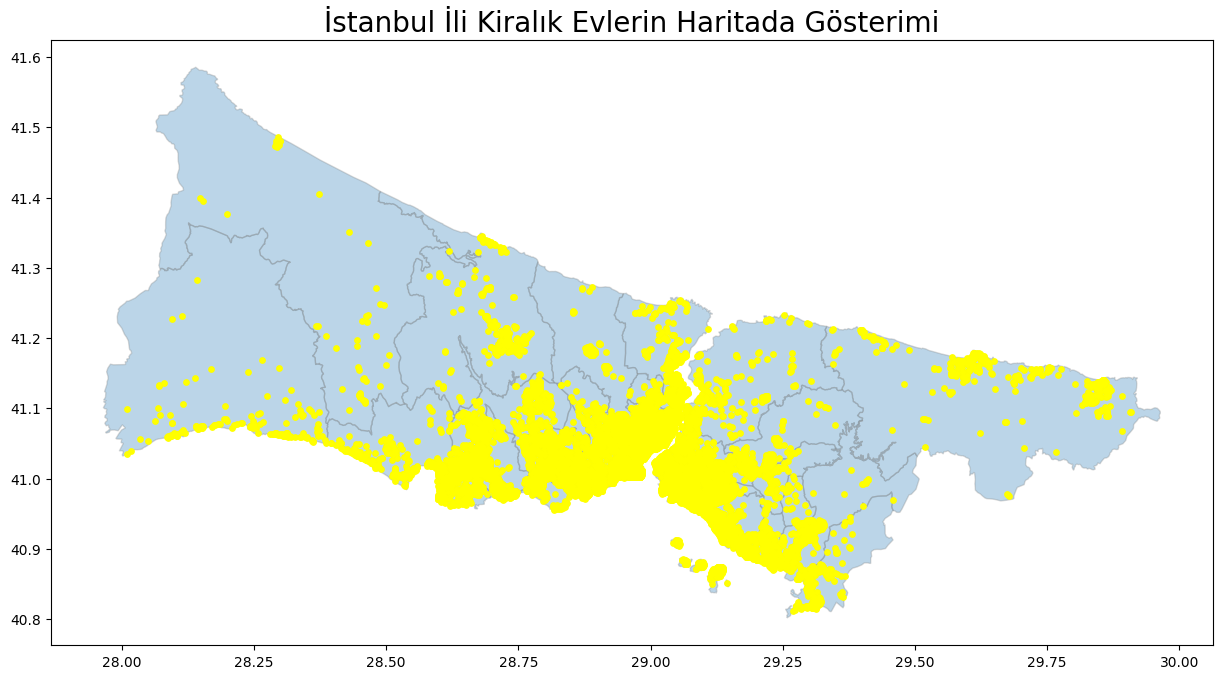

In [27]:
ax = ist_ilce_list.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
ev_list.plot(ax=ax,color='yellow', marker='o', markersize=15)
plt.title('İstanbul İli Kiralık Evlerin Haritada Gösterimi', fontdict={'fontsize':20})
plt.savefig('İstanbul ili kiralık evlerin harita üzerinde gösterimi.png')

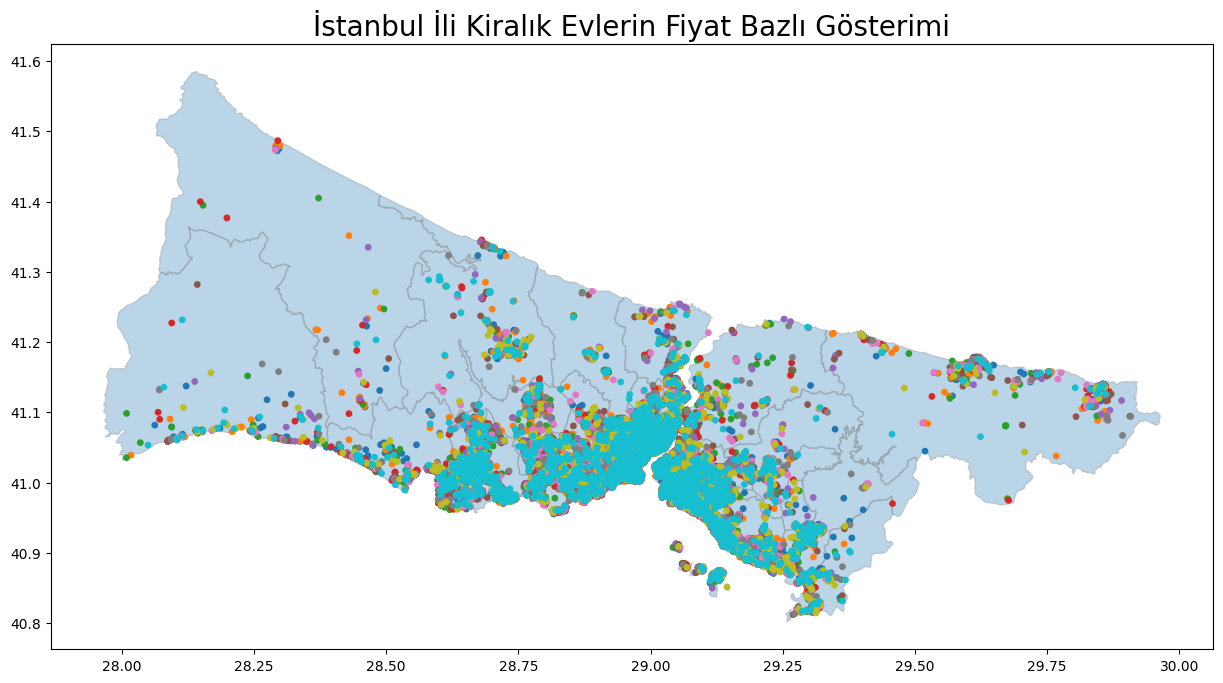

In [28]:
ax = ist_ilce_list.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
ev_list.sort_values('price').plot('price',ax=ax,c='plasma', marker='o', markersize=15)
plt.title('İstanbul İli Kiralık Evlerin Fiyat Bazlı Gösterimi', fontdict={ 'fontsize':20})
plt.savefig('İstanbul ili kiralık evlerin fiyat bazlı gösterimi.png')


In [30]:
evler2 = ev_list.dropna(subset=['description'])
evler2.loc[evler2['description'].str.contains('manzara|Manzara|MANZARA', regex=True)]

,id,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,...,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,reviews_per_month,geometry
0,25436,Rental unit in Beşiktaş bebek 2 bedrooms 4 b...,Evimiz Bebek Koru nun içinde Şehrin içinde k...,NaN,Yesim,İstanbul Turkey,Merhabalar Kuş sesi akan su sesi ile uyanac...,NaN,NaN,Beşiktaş,...,2.0,4.0,"[""Cleaning products"", ""Hot water kettle"", ""Saf...",289400,3,1125,NaN,t,NaN,POINT (29.03863 41.07883)
28,77292,Rental unit in Istanbul 450 3 bedrooms 4 be...,Kim hem Taksime bu kadar yakın hem de sessiz b...,"Gümüssuyu 3+1 Apartment with Terrace, offers y...",Fasedis,İstanbul Turkey,Merkezi konumda çevresinde şık kafe ve restora...,100%,71%,Taksim,...,3.0,4.0,"[""Washer"", ""Heating"", ""Patio or balcony"", ""Wif...",434100,3,730,NaN,t,0.32,POINT (28.98989 41.03583)
393,1319010,Rental unit in Istanbul 1 bedroom 1 bed 1 bath,bThe spacebbr İstanbulun göz bebeği Cihangirde...,NaN,Burak,Istanbul Turkey,i am turkish origin living in ıstanbul,NaN,NaN,Cihangir,...,1.0,1.0,"[""TV"", ""Free street parking"", ""Dryer"", ""Paid p...",1262100,15,30,NaN,t,0.02,POINT (28.98761 41.03031)
556,2409249,Rental unit in Istanbul 1 bedroom 4 beds 1 ...,GORKEMLİ ADALAR İLE MARMARA DENİZİ MANZARASIYL...,BAGDAT CADDESİ SUADİYE,One Istanbul,Istanbul Turkey,Isletmemiz Residence hizmeti veren bir tesisi...,NaN,NaN,Kadıköy,...,1.0,4.0,"[""Washer"", ""Heating"", ""Wifi"", ""Fire extinguish...",868100,1,1125,NaN,f,NaN,POINT (29.08063 40.96057)
772,3136909,Rental unit in Kınalıada 3 bedrooms 5 beds ...,şu anda seyahatte olan yakınımın kaldığı evi k...,çok popüler ve lüx bir tatil merkezi elit ve m...,Yılmaz,Kınalıada Turkey,emekli öğretmen torunları ve çocuklarıyla bera...,NaN,NaN,nan,...,3.0,5.0,"[""Heating"", ""Wifi"", ""Essentials"", ""TV"", ""Pets ...",340600,30,1000,NaN,f,NaN,POINT (29.04898 40.90700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47350,985501554487442714,Home in Beylikdüzü New 4 bedrooms 4 beds 3...,Bu sakin şık mekânda arkanıza yaslanın ve raha...,NaN,Timur,nan,nan,NaN,NaN,nan,...,4.0,4.0,"[""Wifi"", ""Dedicated workspace"", ""TV"", ""Outdoor...",720000,15,365,NaN,t,NaN,POINT (28.61380 40.97238)
47358,984613431959086650,Serviced apartment in Kartal New 1 bedroom ...,İstanbul un büyülü atmosferinde br Prestijli v...,NaN,Aysima,nan,nan,100%,100%,nan,...,1.0,1.0,"[""Cleaning products"", ""HDTV with Netflix"", ""Ho...",176900,1,1125,NaN,t,1.00,POINT (29.20599 40.88422)
47372,984651608411943649,Rental unit in Kadıköy New 2 bedrooms 3 bed...,çatı dubleksinin ikinci katı1 salon 1 oda bany...,NaN,Ibrahim Levent,nan,nan,NaN,NaN,nan,...,2.0,3.0,"[""Wifi"", ""TV"", ""Air conditioning"", ""Piano"", ""F...",350000,3,365,NaN,t,NaN,POINT (29.02472 40.98572)
47377,985608798334451200,Rental unit in Şile New 2 bedrooms 2 beds ...,Agva merkezde kaloriferli doğalgazlibr 21 mutf...,NaN,Kamil,nan,nan,NaN,100%,nan,...,2.0,2.0,"[""Heating"", ""Mountain view"", ""Wifi"", ""TV"", ""Ho...",200000,1,365,NaN,t,NaN,POINT (29.85885 41.13801)


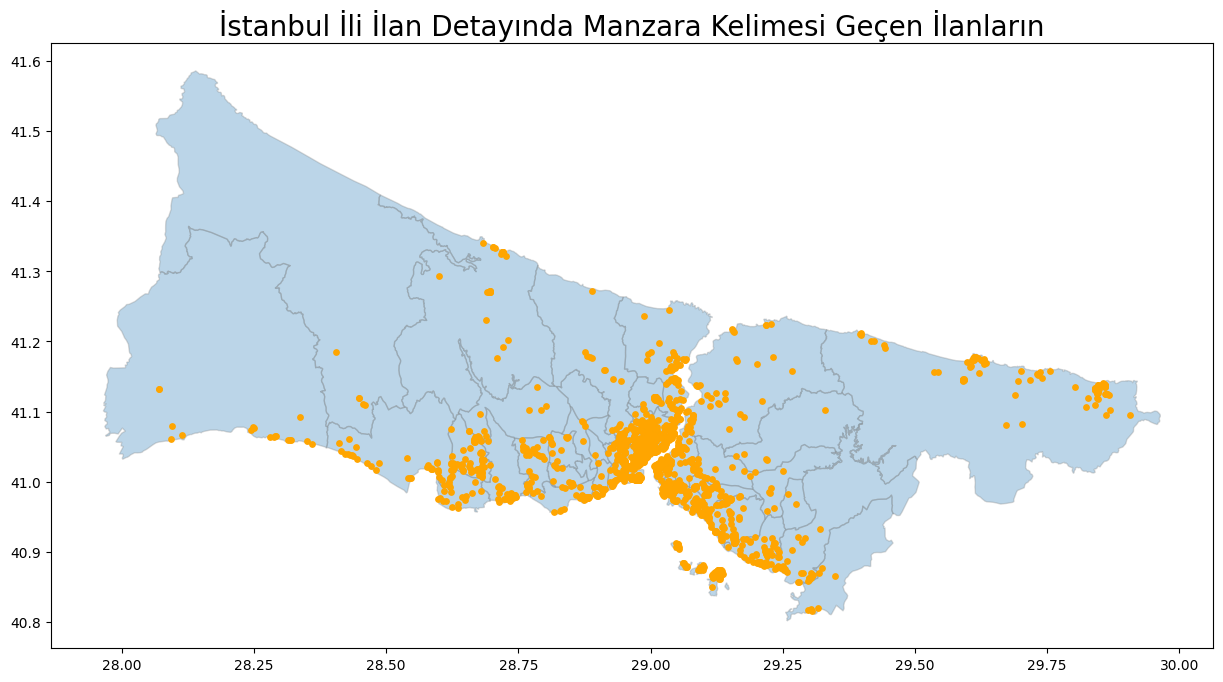

In [31]:
ax = ist_ilce_list.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
ev_list.loc[ev_list['description'].str.contains('manzara|Manzara|MANZARA')].plot(ax=ax, color='orange', marker='o', markersize= 15)
plt.title('İstanbul İli İlan Detayında Manzara Kelimesi Geçen İlanların', fontdict={'fontsize':20})
plt.savefig('İstanbul ili ilan detayında manzara kelimesi geçen ilanların haritada gösterimi.png')

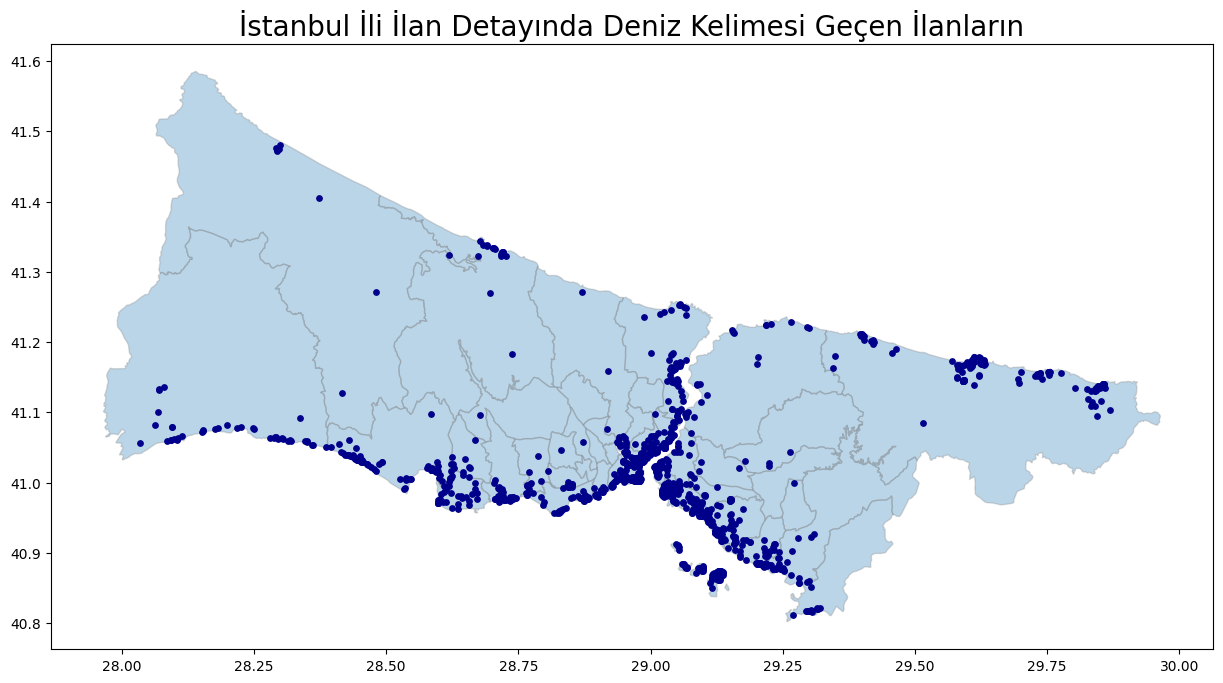

In [33]:
evler2 = ev_list.dropna(subset=['description'])
evler2.loc[evler2['description'].str.contains('deniz|DENIZ|Deniz', regex=True)]

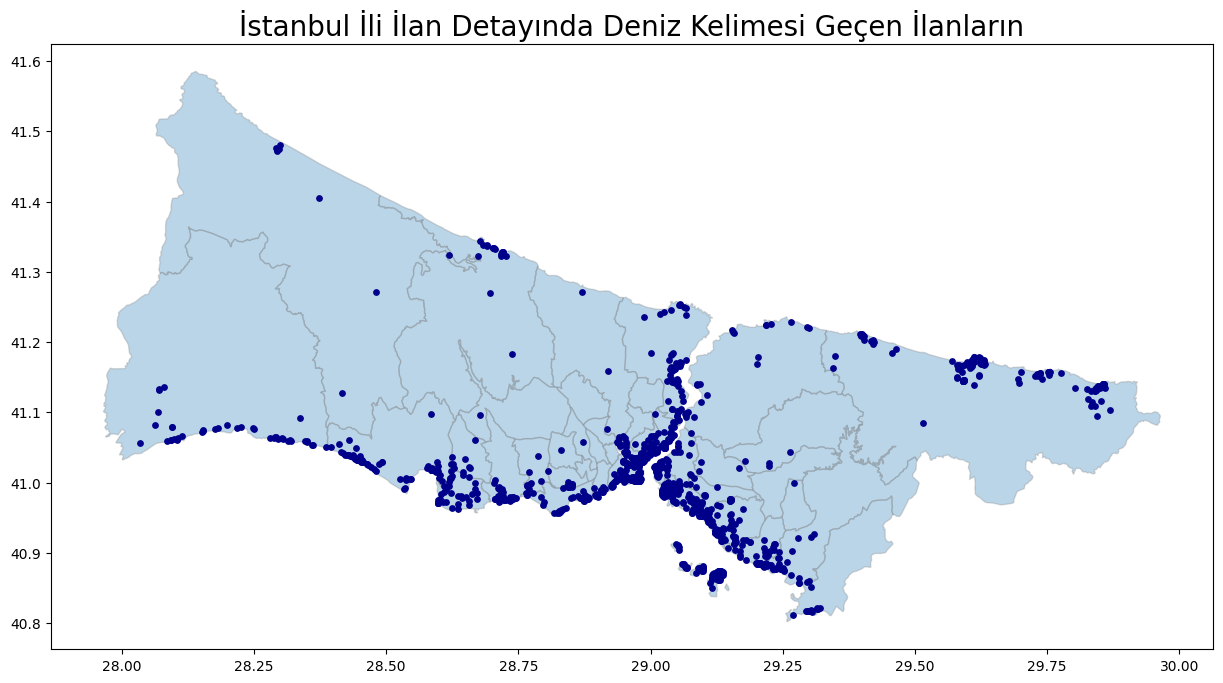

In [34]:
ax = ist_ilce_list.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
ev_list.loc[ev_list['description'].str.contains('deniz|DENIZ|Deniz')].plot(ax=ax, c='darkblue', marker='o', markersize= 15)
plt.title('İstanbul İli İlan Detayında Deniz Kelimesi Geçen İlanların', fontdict={'fontsize':20})
plt.savefig('İstanbul ili ilan detayında deniz kelimesi geçen ilanların haritada gösterimi.png')

In [35]:
evler2 = ev_list.dropna(subset=['description'])
evler2.loc[evler2['description'].str.contains('metrobus|Metrobus|METROBUS', regex=True)]

,id,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,...,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,reviews_per_month,geometry
75,592336,Rental unit in Istanbul 1 bedroom 1 bed 1 bath,bThe spacebbr Im a 23 yearold university stude...,NaN,Ezgi,Istanbul Turkey,Im a 27 yearold woman living in İstanbul,NaN,NaN,Moda,...,NaN,1.0,"[""Heating"", ""Wifi"", ""Smoking allowed"", ""Washer...",115700,1,1125,NaN,f,NaN,POINT (29.03474 40.98556)
114,259206,Rental unit in Istanbul 460 4 bedrooms 4 be...,bThe spacebbr Hibr br This flat is in the cent...,NaN,Feride,Istanbul Turkey,Hi This is Feride I love travelling and meet w...,100%,86%,Şişli,...,4.0,4.0,"[""TV"", ""Paid parking off premises"", ""Washer"", ...",149500,2,365,NaN,t,0.30,POINT (28.99330 41.06362)
121,652469,Rental unit in Istanbul 50 5 bedrooms 5 bed...,bThe spacebbr The place is on the Asian side o...,NaN,Ece Ali,Istanbul Turkey,Organization agency owner,40%,33%,Kadıköy,...,5.0,5.0,"[""Mosquito net"", ""Toaster"", ""TV"", ""Free street...",543600,15,360,NaN,t,0.06,POINT (29.05916 40.97529)
136,684354,Rental unit in Bahçelievler 491 1 bedroom 2...,Location 5 mins from CNR EXPO 20 mins from cit...,NaN,Omer Faruk,İstanbul Turkey,i like travelling and i like meeting new peop...,100%,90%,nan,...,1.0,2.0,"[""Free street parking"", ""Smoke alarm"", ""Free p...",183100,5,999,NaN,t,0.61,POINT (28.81231 41.00468)
156,709378,Rental unit in Istanbul 1 bedroom 1 bed 1 s...,Mekanım şuraya yakın Büyükçekmece Tüyap Benim ...,NaN,Fikret,Istanbul Turkey,26 yıldır Türk Hava Yollarında Teknik Personel...,NaN,NaN,Beşiktaş,...,NaN,1.0,"[""Washer"", ""Heating"", ""Wifi"", ""Essentials"", ""I...",101300,5,10,NaN,f,NaN,POINT (29.00399 41.04284)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47227,983988939057679796,Rental unit in Şişli New 1 bedroom 3 beds ...,Merkezî bir konumda bulunan bu yerde kalırsanı...,bölgenin en nezih gözde semti olup avm hastane...,Turan,İstanbul Turkey,nan,93%,100%,nan,...,1.0,3.0,"[""Cleaning products"", ""Safe"", ""Mosquito net"", ...",124600,1,365,NaN,t,NaN,POINT (28.98771 41.05539)
47238,984958832537653739,Home in Kadıköy New 1 bedroom 1 bed 1 bath,منزلي يبعد عن المتروبيس و الترامواي 400 متر b...,Kadıköy tutkulu ve eğlenceli kültürlü huzur al...,Ufuk Arsel,İstanbul Turkey,nan,NaN,100%,nan,...,1.0,1.0,"[""Baby monitor"", ""Portable air conditioning"", ...",52200,1,1125,NaN,t,NaN,POINT (29.04092 40.99014)
47453,986069693569432839,Rental unit in Kâğıthane New 1 bedroom 1 be...,just a 5minute walk from the M7 metro station ...,NaN,Ebtihel,nan,nan,NaN,NaN,nan,...,1.0,1.0,"[""Washer"", ""Kitchen"", ""Wifi""]",44000,1,365,NaN,t,NaN,POINT (28.97314 41.07573)
47498,986680006407767273,Rental unit in Beyoğlu New 1 bedroom 1 bed ...,Merhaba ben Berk 22 yasindayim İstanbul Teknik...,NaN,Berk,Ankara Turkey,İstanbul Teknik Üniversitesi\n,NaN,NaN,nan,...,1.0,1.0,"[""Wifi"", ""Security cameras on property"", ""Smok...",32000,1,365,NaN,t,NaN,POINT (28.96114 41.04131)


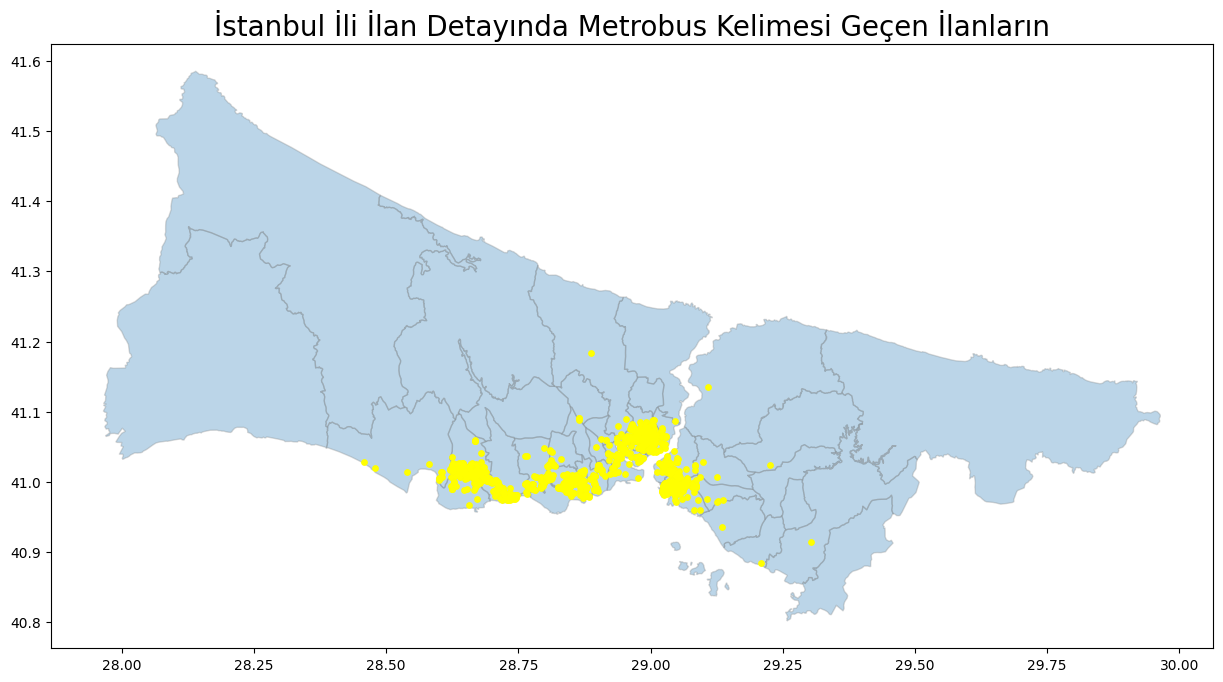

In [37]:
ax = ist_ilce_list.plot(figsize=(15,15), alpha = 0.3, edgecolor ='gray')
ev_list.loc[ev_list['description'].str.contains('metrobus|Metrobus|METROBUS')].plot(ax=ax, color='yellow', marker='o', markersize= 15)
plt.title('İstanbul İli İlan Detayında Metrobus Kelimesi Geçen İlanların', fontdict={'fontsize':20})
plt.savefig('İstanbul ili ilan detayında metrobüs kelimesi geçen ilanların haritada gösterimi.png')


In [38]:
ev_ilce_list = gpd.sjoin(ev_list, ist_ilce_list, op='within', how='left')
ev_ilce_list

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-38-c31a717dd665>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  ev_ilce_list = gpd.sjoin(ev_list, ist_ilce_list, op='within', how='left')


,id,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,...,price,minimum_nights,maximum_nights,calendar_updated,has_availability,reviews_per_month,geometry,index_right,neighbourhood_right,neighbourhood_group
0,25436,Rental unit in Beşiktaş bebek 2 bedrooms 4 b...,Evimiz Bebek Koru nun içinde Şehrin içinde k...,NaN,Yesim,İstanbul Turkey,Merhabalar Kuş sesi akan su sesi ile uyanac...,NaN,NaN,Beşiktaş,...,289400,3,1125,NaN,t,NaN,POINT (29.03863 41.07883),23.0,Besiktas,None
1,27271,Rental unit in Istanbul Province 50 1 bedroo...,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,Mutlu,Istanbul Turkey,I am a tourist guide and diving instructor I ...,0%,50%,Cihangir,...,144700,10,90,NaN,t,0.04,POINT (28.98153 41.03254),22.0,Beyoglu,None
2,423833,Rental unit in Istanbul 1 bedroom 4 beds 1 ...,bThe spacebbr Hithe house is central and in a ...,The neigborhood is safe. It's central anything...,Sanem,Istanbul Turkey,Hi\r\nI am expecting guests I think i am frien...,NaN,NaN,Şişli,...,115700,2,60,NaN,f,0.01,POINT (28.99176 41.05317),25.0,Sisli,None
3,28277,Serviced apartment in Istanbul 50 1 bedroom ...,bThe spacebbr The first advantage to stay in o...,NaN,Alen,İstanbul Turkey,I have been working as a property manager in İ...,100%,78%,Şişli,...,257500,10,360,NaN,t,0.28,POINT (28.98402 41.04672),25.0,Sisli,None
4,429200,Loft in Istanbul Galata Beyoglu Tophane 2 be...,bThe spacebbr in the heart of İstanbul in the ...,NaN,Mehmet Ali,Istanbul Turkey,I am experienced in hosting people from all ov...,NaN,100%,Karaköy,...,228600,5,1125,NaN,t,0.01,POINT (28.97751 41.02734),22.0,Beyoglu,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47513,986773115219367953,Rental unit in Şişli New 1 bedroom 1 bed 1...,Bu huzurlu konaklama yerinde ailece dinlenebil...,NaN,Cumali,nan,nan,NaN,NaN,nan,...,115700,1,365,NaN,t,NaN,POINT (28.97717 41.05536),25.0,Sisli,None
47514,986776164830323649,Rental unit in Kadıköy New 3 bedrooms 4 bed...,Welcome to Moda district the most modern face ...,NaN,Serhan,Fethiye Turkey,Traveller couple,100%,NaN,nan,...,250000,5,60,NaN,t,NaN,POINT (29.02227 40.98042),29.0,Kadikoy,None
47515,986790278919805377,Rental unit in Kadıköy New 2 bedrooms 2 bed...,central location apartment in kadikoy istanbul...,NaN,Sherif,nan,nan,100%,100%,nan,...,118400,3,90,NaN,t,NaN,POINT (29.02712 40.99471),29.0,Kadikoy,None
47516,986796471490590812,Rental unit in Beyoğlu New 1 bedroom 1 bed ...,Welcome to a stay at an apartment in a newly r...,NaN,Tevfik,Izmir Turkey,nan,100%,90%,nan,...,205800,2,365,NaN,t,NaN,POINT (28.97322 41.02506),22.0,Beyoglu,None


In [39]:
ev_ilce_list['price'] = ev_ilce_list['price'].astype(str)
ev_ilce_list['price'] = ev_ilce_list['price'].astype(float)

İlce_ort_price = (ev_ilce_list.groupby(['neighbourhood_right'])['price'].mean()/100000).round(4)
İlce_ort_price =İlce_ort_price.sort_values(ascending=False)
İlce_ort_price

neighbourhood_right
Cekmekoy         5.5024
Buyukcekmece     5.0361
Beykoz           4.8753
Besiktas         4.7831
Bagcilar         4.6350
Silivri          4.5171
Eyup             4.1577
Sariyer          3.7341
Sile             3.3604
Sancaktepe       3.2391
Beyoglu          2.9834
Adalar           2.9555
Fatih            2.8343
Catalca          2.7905
Sisli            2.7683
Gaziosmanpasa    2.7582
Basaksehir       2.5319
Bakirkoy         2.4410
Kucukcekmece     2.4206
Beylikduzu       2.3901
Bahcelievler     2.3688
Pendik           2.1267
Uskudar          2.0263
Zeytinburnu      2.0218
Arnavutkoy       1.9332
Atasehir         1.8736
Bayrampasa       1.8098
Tuzla            1.7712
Kadikoy          1.7609
Umraniye         1.7556
Kagithane        1.6548
Kartal           1.6508
Esenyurt         1.6138
Sultangazi       1.4779
Maltepe          1.3505
Avcilar          1.2781
Esenler          1.2768
Gungoren         1.2444
Sultanbeyli      1.0553
Name: price, dtype: float64

In [40]:
ev_ilce_list['toplam ev sayısı']  =1
ev_ilce_list
toplam_ev_sayısı = ev_ilce_list.groupby(['neighbourhood_right']).count()['toplam ev sayısı']
toplam_ev_sayısı.sort_values(ascending=False)
toplam_ev_sayısı = toplam_ev_sayısı.to_frame()

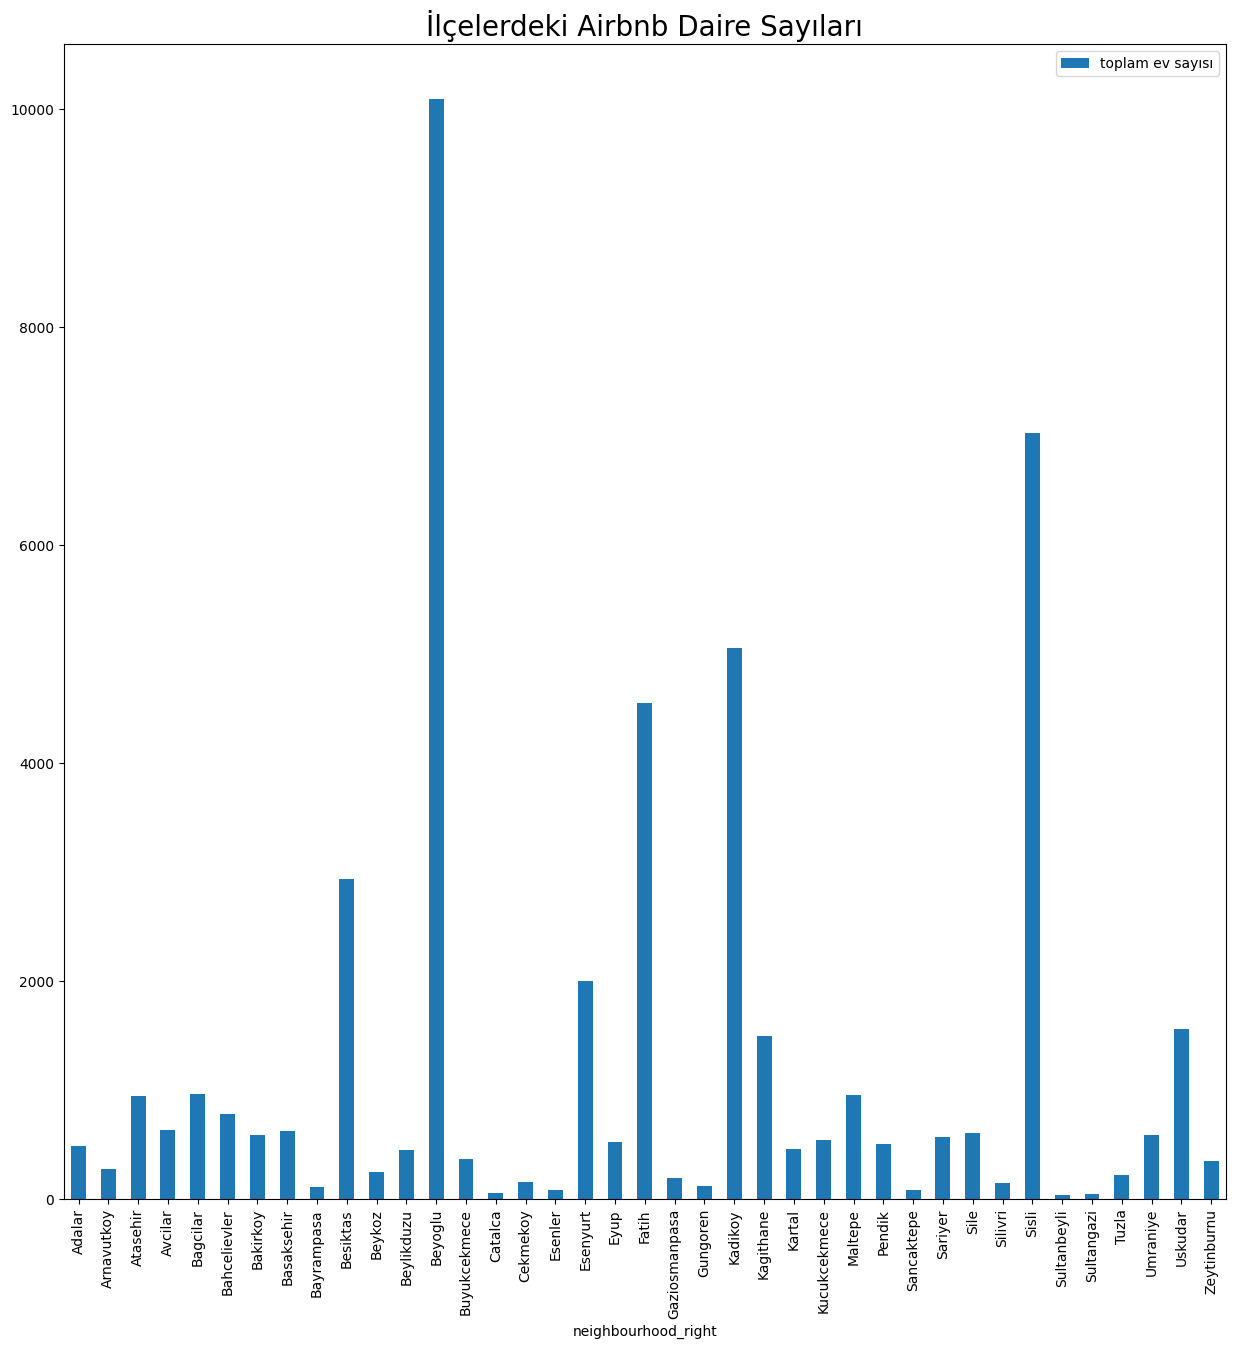

In [42]:
toplam_ev_sayısı.plot(kind='bar', figsize=(15,15))
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontsize':20})
plt.savefig('İstanbul ili ilçe bazlı kiralık ev sayıları gösterimi.png')


In [44]:
toplam_ev_sayısı.plot(kind='pie', figsize=(15,15))
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

ValueError: pie requires either y column or 'subplots=True'

In [45]:

ev_ilce_price_merge = ist_ilce_list.merge(İlce_ort_price,left_on='neighbourhood', right_on='neighbourhood_right')
ev_ilce_ort_top_list = ev_ilce_price_merge.merge(toplam_ev_sayısı,left_on='neighbourhood', right_on='neighbourhood_right')
ev_ilce_ort_top_list

,neighbourhood,neighbourhood_group,geometry,price,toplam ev sayısı
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",3.3604,607
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",2.7905,54
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",4.1577,524
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",3.7341,569
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",1.9332,278
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41...",4.5171,150
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41...",1.6548,1499
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41...",5.0361,370
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41...",1.6138,2000
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41...",2.3901,454


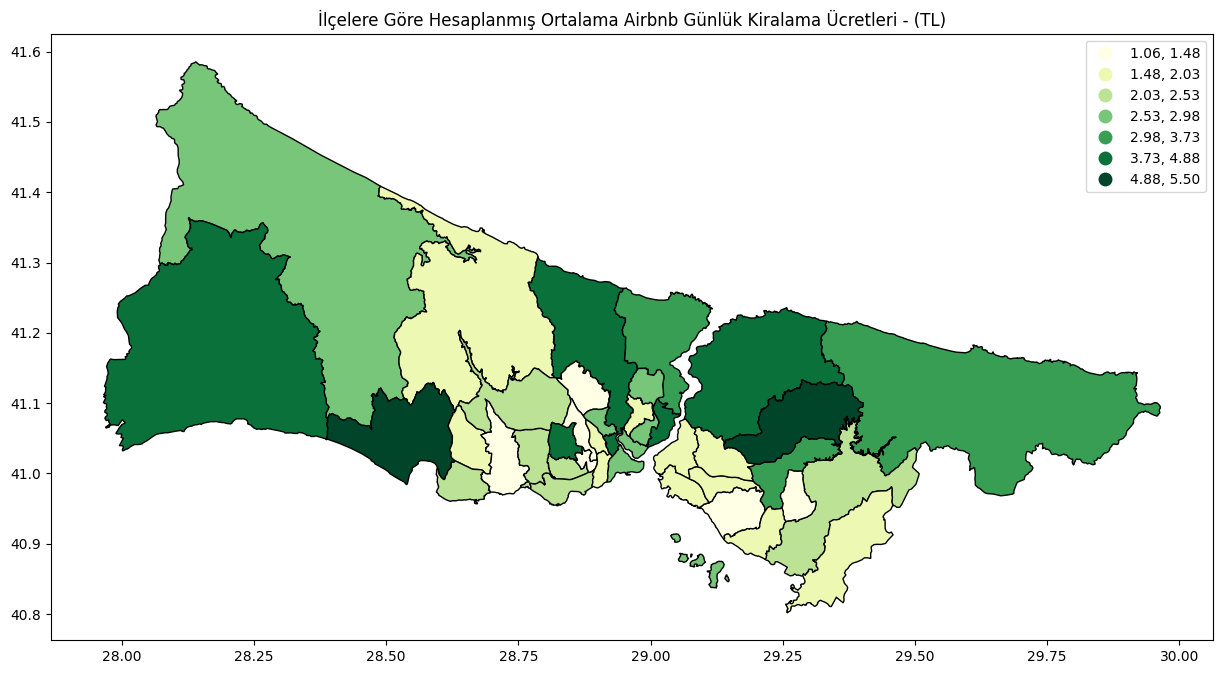

In [46]:
ax = ev_ilce_ort_top_list.plot(figsize=(15,15), column='price', scheme='fisher_jenks', k=7, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)
plt.savefig('İstanbul ili ilçe ortalama ev kiralama fiyatları harita gösterimi.png')

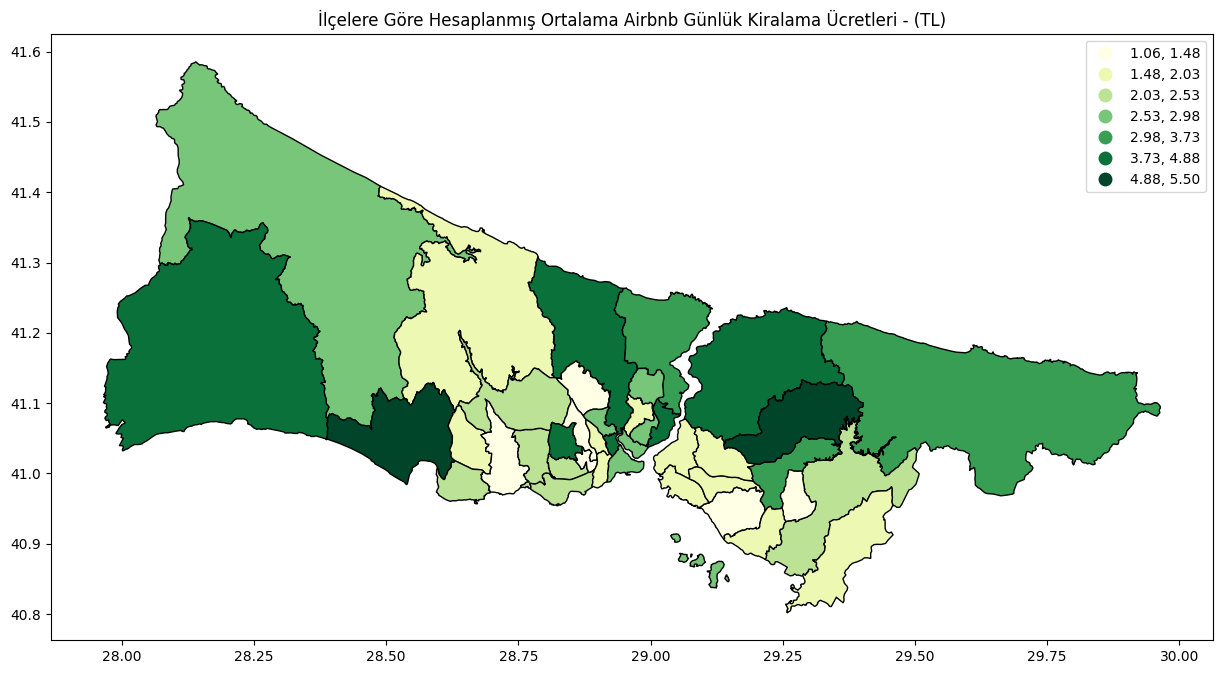

In [47]:
ax = ev_ilce_ort_top_list.plot(figsize=(15,15), column='price', scheme='fisher_jenks', k=7, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)

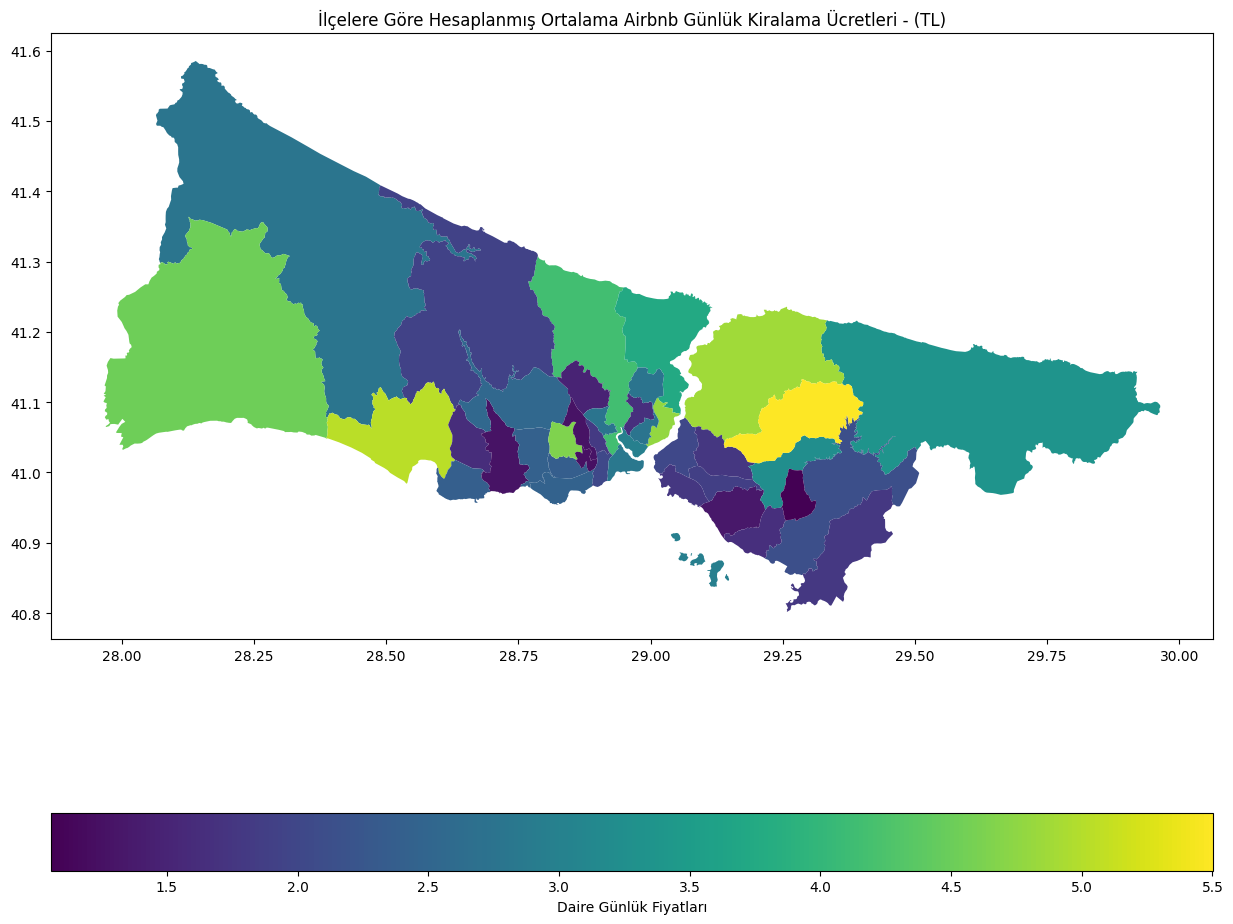

<Figure size 640x480 with 0 Axes>

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ev_ilce_ort_top_list.plot(column='price', ax=ax, legend=True, legend_kwds={'label': 'Daire Günlük Fiyatları', 'orientation': 'horizontal'})
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.show()
plt.savefig('İstanbul ili ilçe ortalama ev kiralama fiyatları harita gösterimi2.png')